In [1]:
%matplotlib widget
%load_ext autoreload
%autoreload 2
import pickle
from src.cort_processor import *
from src.phase_decoder_support import *
from sklearn import metrics
import scipy
from scipy import integrate
from matplotlib import colors
from src.phase_decoder_support import *
import matplotlib.collections as mcoll
import matplotlib.path as mpath
from sklearn.metrics import r2_score
from matplotlib.patches import Rectangle
from scipy.stats import pearsonr
import seaborn as sns
import os
import pandas as pd

In [2]:
with open('/mnt/c/oobootoo/rat-fes/data/pickles/automatic2.1_norefrac/rollie_0120_session.pkl', 'rb') as inp:
    data1r = pickle.load(inp)
with open('/mnt/c/oobootoo/rat-fes/data/pickles/automatic2.1_norefrac/rollie_0203_session.pkl', 'rb') as inp:
    data2r = pickle.load(inp)
with open('/mnt/c/oobootoo/rat-fes/data/pickles/automatic2.1_norefrac/rollie_0210_session.pkl', 'rb') as inp:
    data3r = pickle.load(inp)
with open('/mnt/c/oobootoo/rat-fes/data/pickles/automatic2.1_norefrac/rollie_0216_session.pkl', 'rb') as inp:
    data4r = pickle.load(inp)
with open('/mnt/c/oobootoo/rat-fes/data/pickles/automatic2.1_norefrac/rollie_0224_session.pkl', 'rb') as inp:
    data5r = pickle.load(inp) 
with open('/mnt/c/oobootoo/rat-fes/data/pickles/automatic2.1_norefrac/tequatl_0120_session.pkl', 'rb') as inp:
    data1t = pickle.load(inp)
with open('/mnt/c/oobootoo/rat-fes/data/pickles/automatic2.1_norefrac/tequatl_0210_session.pkl', 'rb') as inp:
    data2t = pickle.load(inp)
with open('/mnt/c/oobootoo/rat-fes/data/pickles/automatic2.1_norefrac/tequatl_0216_session.pkl', 'rb') as inp:
    data3t = pickle.load(inp)
with open('/mnt/c/oobootoo/rat-fes/data/pickles/automatic2.1_norefrac/tequatl_0224_session.pkl', 'rb') as inp:
    data4t = pickle.load(inp)
with open('/mnt/c/oobootoo/rat-fes/data/pickles/automatic2.1_norefrac/meepo_923_session.pkl', 'rb') as inp:
    data1m = pickle.load(inp)
with open('/mnt/c/oobootoo/rat-fes/data/pickles/automatic2.1_norefrac/meepo_1004_session.pkl', 'rb') as inp:
    data2m = pickle.load(inp)
with open('/mnt/c/oobootoo/rat-fes/data/pickles/automatic2.1_norefrac/meepo_1010_session.pkl', 'rb') as inp:
    data3m = pickle.load(inp)
with open('/mnt/c/oobootoo/rat-fes/data/pickles/automatic2.1_norefrac/meepo_1017_session.pkl', 'rb') as inp:
    data4m = pickle.load(inp)

In [3]:
UL = 10
LL = 10

In [5]:
score1r, _, _, _, _, _, _, vaf1r, _, _, _ = data1r.phase_train(upper_limit = UL, lower_limit = LL)
score2r, _, _, _, _, _, _, vaf2r, _, _, _ = data2r.phase_train(upper_limit = UL, lower_limit = LL)
score3r, _, _, _, _, _, _, vaf3r, _, _, _ = data3r.phase_train(upper_limit = UL, lower_limit = LL)
score4r, _, _, _, _, _, _, vaf4r, _, _, _ = data4r.phase_train(upper_limit = UL, lower_limit = LL)
score5r, _, _, _, _, _, _, vaf5r, _, _, _ = data5r.phase_train(upper_limit = UL, lower_limit = LL)

In [6]:
score1t, _, _, _, _, _, _, vaf1t, _, _, _ = data1t.phase_train(upper_limit = UL, lower_limit = LL)
score2t, _, _, _, _, _, _, vaf2t, _, _, _ = data2t.phase_train(upper_limit = UL, lower_limit = LL)
score3t, _, _, _, _, _, _, vaf3t, _, _, _ = data3t.phase_train(upper_limit = UL, lower_limit = LL)
score4t, _, _, _, _, _, _, vaf4t, _, _, _ = data4t.phase_train(upper_limit = UL, lower_limit = LL)

In [7]:
score1m, _, _, _, _, _, _, vaf1m, _, _, _ = data1m.phase_train(upper_limit = UL, lower_limit = LL)
score2m, _, _, _, _, _, _, vaf2m, _, _, _ = data2m.phase_train(upper_limit = UL, lower_limit = LL)
score3m, _, _, _, _, _, _, vaf3m, _, _, _ = data3m.phase_train(upper_limit = UL, lower_limit = LL)
score4m, _, _, _, _, _, _, vaf4m, _, _, _ = data4m.phase_train(upper_limit = UL, lower_limit = LL)

In [8]:
# m_circorr = [score1m[2],score2m[2],score3m[2],score4m[2]]
# r_circorr = [score1r[2],score2r[2],score3r[2],score4r[2],score5r[2]]
# t_circorr = [score1t[2],score2t[2],score3t[2],score4t[2]]



In [9]:
r_roc = [score1r[0],score2r[0],score3r[0],score4r[0],score5r[0]]
r_acc = [score1r[1],score2r[1],score3r[1],score4r[1],score5r[1]]
r_circorr = [score1r[2],score2r[2],score3r[2],score4r[2],score5r[2]]
r_r2_sin = [score1r[3],score2r[3],score3r[3],score4r[3],score5r[3]]
r_r2_fore = [vaf1r[6],vaf2r[6],vaf3r[6],vaf4r[6],vaf5r[6]]
r_r2_hind = [vaf1r[3],vaf2r[3],vaf3r[3],vaf4r[3],vaf5r[3]]
t_roc = [score1t[0],score2t[0],score3t[0],score4t[0]]
t_acc = [score1t[1],score2t[1],score3t[1],score4t[1]]
t_circorr = [score1t[2],score2t[2],score3t[2],score4t[2]]
t_r2_sin = [score1t[3],score2t[3],score3t[3],score4t[3]]
t_r2_fore = [vaf1t[6],vaf2t[6],vaf3t[6],vaf4t[6]]
t_r2_hind = [vaf1t[3],vaf2t[3],vaf3t[3],vaf4t[3]]
m_roc = [score1m[1],score2m[1],score3m[1],score4m[1]]
m_acc = [score1m[1],score2m[1],score3m[1],score4m[1]]
m_circorr = [score1m[2],score2m[2],score3m[2],score4m[2]]
m_r2_sin = [score1m[3],score2m[3],score3m[3],score4m[3]]
m_r2_fore = [vaf1m[6],vaf2m[6],vaf3m[6],vaf4m[6]]
m_r2_hind = [vaf1m[3],vaf2m[3],vaf3m[3],vaf4m[3]]

In [10]:
print(r_circorr)
print(t_circorr)
print(m_circorr)

[0.6890112500000001, 0.4555343499999999, 0.30470244, 0.4252357, 0.32366222]
[0.70743989, 0.23814771, 0.37285153000000004, 0.17539068000000002]
[0.48757538999999994, 0.31636675, 0.13949959, 0.24443688999999996]


In [11]:
print(np.mean([0.4555343499999999, 0.30470244, 0.4252357, 0.32366222, 0.23814771, 0.37285153000000004, 0.17539068000000002, 0.31636675, 0.13949959, 0.24443688999999996]))
print(np.std([0.4555343499999999, 0.30470244, 0.4252357, 0.32366222, 0.23814771, 0.37285153000000004, 0.17539068000000002, 0.31636675, 0.13949959, 0.24443688999999996]))

0.299582786
0.09707277303524743


In [12]:
print(np.mean([0.6890112500000001,0.70743989,0.48757538999999994]))
print(np.std([0.6890112500000001,0.70743989,0.48757538999999994]))

0.6280088433333333
0.09958604254414553


In [13]:
print(np.mean([0.11275114341692198, 0.037349176403054504, 0.05306146082620731, 0.015246499998487595,-0.1391410927589669, -0.12209287120352477, -0.10297563835470647, -0.055183850603404416, -0.09621683813445332, -0.1519681634059406]))
print(np.std([0.11275114341692198, 0.037349176403054504, 0.05306146082620731, 0.015246499998487595,-0.1391410927589669, -0.12209287120352477, -0.10297563835470647, -0.055183850603404416, -0.09621683813445332, -0.1519681634059406]))

-0.04491701738163251
0.08789114072921705


In [14]:
print(np.mean([0.4970978589604208,0.475983727933284,0.1580459156310787]))
print(np.std([0.4970978589604208,0.475983727933284,0.1580459156310787]))

0.3770425008415945
0.15509369186109795


In [15]:
print(r_r2_fore)
print(t_r2_fore)
print(m_r2_fore)

[0.7355977, 0.37504045, 0.36104949999999997, 0.28297869, 0.27317826]
[0.7365793999999999, 0.18018213, 0.14018057, 0.14417598]
[0.48209425, 0.23261715, 0.08987581, 0.13470390000000002]


In [16]:
print(np.mean([0.5501821260664984, 0.538196154578748, 0.18058220869816338, 0.4456676567844758, 0.19550627634797707, 0.033871968159033775, 0.2277537708900071,-0.5331363466741206, -0.2646431850296099, -0.28749119717067545])) 
print(np.std([0.5501821260664984, 0.538196154578748, 0.18058220869816338, 0.4456676567844758, 0.19550627634797707, 0.033871968159033775, 0.2277537708900071,-0.5331363466741206, -0.2646431850296099, -0.28749119717067545])) 

0.10864894326504977
0.35124101423006754


In [17]:
print(np.mean([0.7030483651302223,0.6485080395706921,0.2409019095774735]))
print(np.std([0.7030483651302223,0.6485080395706921,0.2409019095774735]))


0.5308194380927961
0.20620829563552076


In [18]:
print(r_r2_hind)
print(t_r2_hind)
print(m_r2_hind)

[0.8506712999999999, 0.7544080999999999, 0.7590627999999999, 0.48442308999999995, 0.70727051]
[0.8215173, 0.48961277999999997, 0.36289495, 0.51387088]
[0.56998111, 0.05321570000000001, 0.03750651, 0.083266]


In [19]:
-29.37
-38
-42

-42

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
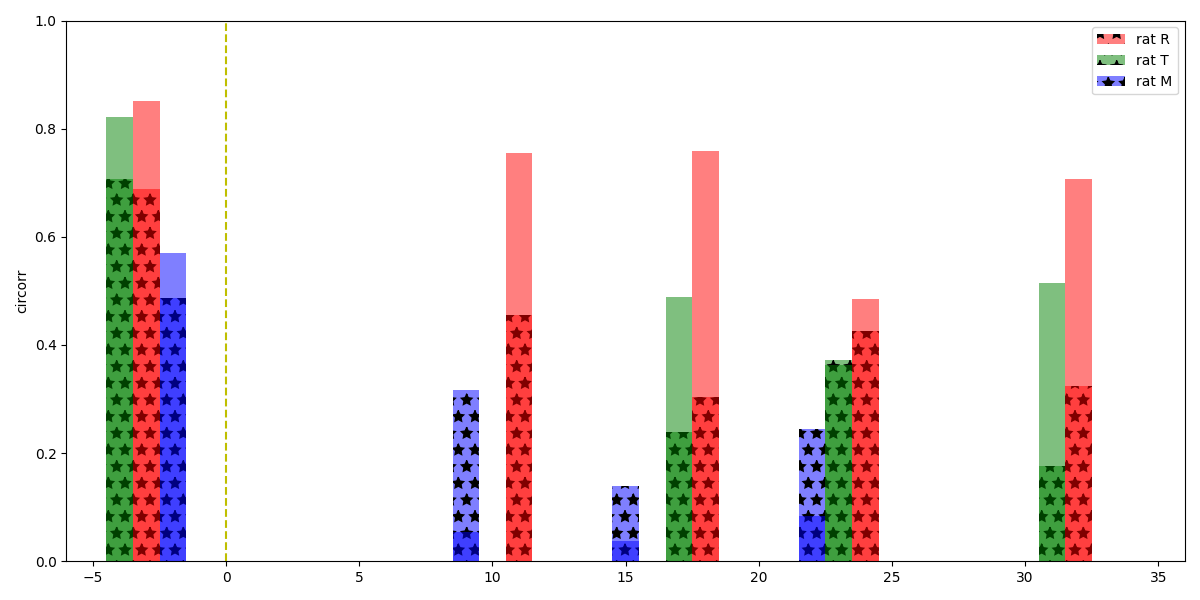

In [26]:
# datesR = np.array([-55, -45, -38, -20, -11, -3, 11, 18, 24, 32, 38, 49])
# datesT = np.array([-3, 18, 24, 32])
# datesM = np.array([-7,-3,8,14,21])


# hindr2R = np.array([0.43,0.22,0.47,0.13,0.63,0.45,0.51,0.32,0.21,0.50,0.52,0.45])
# hindr2T = np.array([0.69,-0.01,0.09,0.07])
# hindr2M = np.array([0.19,0.26,-0.42,-0.16,-0.78])

# forer2R = np.array([0.23,-0.07,0.34,0.39,0.48,0.38,0.11,-0.01,0.03,0.02,0.04,0.04])
# forer2T = np.array([0.54,-0.06,-0.12,-0.16])
# forer2M = np.array([0.09,0.19,0.00,-0.11,-0.06])

# phaser2R = np.array([0.56,0.39,0.62,0.67,0.58,0.59,-0.05,-0.44,0.02,-0.12,-0.13,0.01])
# phaser2T = np.array([0.71,-0.62,-0.17,-0.46])
# phaser2M = np.array([0.31,0.18,-0.16,-0.58,-0.20])

# phasepearR = np.array([0.68,0.47,0.71,0.76,0.70,0.63,0.40,0.21,0.40,0.35,0.34,0.33])
# phasepearT = np.array([0.78,0.05,0.26,0.17])
# phasepearM = np.array([])

# rocaucR = np.array([0.83,0.80,0.87,0.89,0.87,0.86,0.73,0.63,0.76,0.76,0.73,0.77])
# rocaucT = np.array([0.89,0.58,0.74,0.60])
# rocaucM = np.array([0.81,0.76,0.71,0.64,0.71])



datesR = np.array([-3, 11, 18, 24, 32])
datesT = np.array([-3, 18, 24, 32])
datesM = np.array([-3,8,14,21])
# datesTP = np.array([-3])
# datesMP = np.array([-3])
# datesTN = np.array([18, 24, 32])
# datesMN = np.array([8,14,21])
# datesMN2 = np.array([24])
# datesMP2 = np.array([-3,18,32])

# hindr2R = np.array([0.719065667,0.581609971,0.623297705,0.18177342,0.472061546])
# hindr2T = np.array([0.664997481,0.206404593,0.093375072,0.293947786])
# hindr2MP = np.array([0.274313966])
# hindr2MN = np.array([-0.62,-0.87,-0.66])



# forer2R = np.array([0.504421941,0.128765207,0.013909446,0.036950341,0.012123992])
# forer2TP = np.array([0.445715383])
# forer2MP = np.array([0.191674747])
# forer2TN = np.array([-0.11336319,-0.08,-0.07])
# forer2MN = np.array([-0.04,-0.26,-0.12])


# rocaucR = np.array([0.870112497,0.756558786,0.708119244,0.732617968,0.721576656])
# rocaucT = np.array([0.858273667,0.651559896,0.716312443,0.632493803])
# rocaucM = np.array([0.746187572,0.690612568,0.595995176,0.67])


rocM = np.array(m_roc)
accM = np.array(m_acc)
circorrM = np.array(m_circorr)
sinr2M = np.array(m_r2_sin)
hindr2M = np.array(m_r2_hind)
forer2M = np.array(m_r2_fore)

rocR = np.array(r_roc)
accR = np.array(r_acc)
circorrR = np.array(r_circorr)
sinr2R = np.array(r_r2_sin)
forer2R = np.array(r_r2_fore)
hindr2R = np.array(r_r2_hind)

rocT = np.array(t_roc)
accT = np.array(t_acc)
circorrT = np.array(t_circorr)
sinr2T = np.array(t_r2_sin)
hindr2T = np.array(t_r2_hind)
forer2T = np.array(t_r2_fore)


fig1, ax = plt.subplots(1,1, figsize=(12,6), sharey=False, sharex=True)
# ax[1].axhline(y=0, alpha = 0.3, color = 'k')

ax.bar(x = datesR, height = circorrR, width = 1, color = 'r', alpha = 0.5, label = 'rat R', hatch = '*')
ax.bar(x = datesT-1, height = circorrT, width = 1, color = 'g', alpha = 0.5, label = 'rat T', hatch = '*')
ax.bar(x = datesM+1, height = circorrM, width = 1, color = 'b', alpha = 0.5, label = 'rat M', hatch = '*')
ax.set_xlim(-6,36)
ax.set_xlim(-6,36)
ax.set_xlim(-6,36)
# ax[3].set_xlim(-6,36)

ax.axvline(x = 0, c='y', linestyle = '--')
ax.set_ylim(0,1)
# ax[0].set_title('Phase Decoder ROC as Affected by SCI')
ax.set_ylabel('circorr')
# ax[0].set_xlabel('Days Since Injury')
ax.legend(loc='upper right')


# ax[1].bar(x = datesR, height = sinr2R, width = 1, color = 'r', alpha = 1, label = 'rat R')
# ax[1].bar(x = datesT-1, height = sinr2T, width = 1, color = 'g', alpha = 1, label = 'rat T')
# ax[1].bar(x = datesMP2+1, height = sinr2MP, width = 1, color = 'b', alpha = 1, label = 'rat M')
# ax[1].bar(x = datesMN2+1, height = sinr2MN, width = 1, color = 'b', alpha = 0.3)
# ax[1].set_ylim(-0.1,1)

# ax[1].axvline(x = 0, c='y', linestyle = '--')
# # ax[1].axhline(y = 0, c='k')
# # ax[1].set_title('Hindlimb Angle Decoder Performace as Affected by SCI')
# ax[1].set_ylabel('sin/cos $R^2$')
# # ax[1].set_xlabel('Days Since Injury')
# # ax[1].legend()


# ax[1].bar(x = datesR, height = forer2R, width = 1, color = 'r', alpha = 1, label = 'rat R')
# ax[1].bar(x = datesT-1, height = forer2T, width = 1, color = 'g', alpha = 1, label = 'rat T')
# ax[1].bar(x = datesM+1, height = forer2M, width = 1, color = 'b', alpha = 1, label = 'rat M')
# ax[1].axvline(x = 0, c='y', linestyle = '--')
# # ax[1].axhline(y = 0, c='k')
# # ax[1].set_ylim(-.28,1)

# # ax[2].set_title('Forelimb Angle Decoder Performace as Affected by SCI')
# ax[1].set_ylabel('forelimb $R^2$')

# # ax[2].set_xlabel('Days Since Injury')
# # ax[2].legend()

ax.bar(x = datesR, height = hindr2R, width = 1, color = 'r', alpha = 0.5, label = 'rat R')
ax.bar(x = datesT-1, height = hindr2T, width = 1, color = 'g', alpha = 0.5, label = 'rat T')
ax.bar(x = datesM+1, height = hindr2M, width = 1, color = 'b', alpha = 0.5, label = 'rat M')
# ax.axvline(x = 0, c='y', linestyle = '--')
# # ax[1].axhline(y = 0, c='k')
# ax.set_ylim(-0.9,1)
# # ax[3].set_title('Phase Decoder Performace as Affected by SCI')
# ax[2].set_ylabel('hindlimb $R^2$')
# ax[2].set_xlabel('Days Since Injury')
# # # ax[3].legend()

# ax[0].set_ylim(0,1)
# ax[1].set_ylim(0,1)
# ax[2].set_ylim(0,1)
# ax[3].set_ylim(0,1)


fig1.tight_layout()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
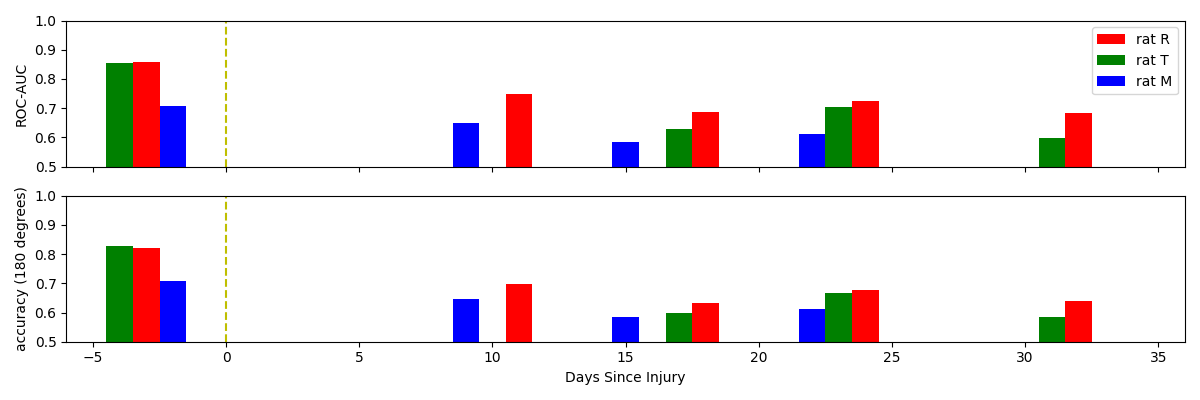

In [21]:
fig1, ax = plt.subplots(2,1, figsize=(12,4), sharey=False, sharex=True)
# ax[1].axhline(y=0, alpha = 0.3, color = 'k')

ax[0].bar(x = datesR, height = rocR, width = 1, color = 'r', alpha = 1, label = 'rat R')
ax[0].bar(x = datesT-1, height = rocT, width = 1, color = 'g', alpha = 1, label = 'rat T')
ax[0].bar(x = datesM+1, height = rocM, width = 1, color = 'b', alpha = 1, label = 'rat M')
ax[0].set_xlim(-6,36)
ax[1].set_xlim(-6,36)
# ax[2].set_xlim(-6,36)
# ax[3].set_xlim(-6,36)

ax[0].axvline(x = 0, c='y', linestyle = '--')
ax[0].set_ylim(0,1)
# ax[0].set_title('Phase Decoder ROC as Affected by SCI')
ax[0].set_ylabel('ROC-AUC')
# ax[0].set_xlabel('Days Since Injury')
ax[0].legend(loc='upper right')


# ax[1].bar(x = datesR, height = sinr2R, width = 1, color = 'r', alpha = 1, label = 'rat R')
# ax[1].bar(x = datesT-1, height = sinr2T, width = 1, color = 'g', alpha = 1, label = 'rat T')
# ax[1].bar(x = datesMP2+1, height = sinr2MP, width = 1, color = 'b', alpha = 1, label = 'rat M')
# ax[1].bar(x = datesMN2+1, height = sinr2MN, width = 1, color = 'b', alpha = 0.3)
# ax[1].set_ylim(-0.1,1)

# ax[1].axvline(x = 0, c='y', linestyle = '--')
# # ax[1].axhline(y = 0, c='k')
# # ax[1].set_title('Hindlimb Angle Decoder Performace as Affected by SCI')
# ax[1].set_ylabel('sin/cos $R^2$')
# # ax[1].set_xlabel('Days Since Injury')
# # ax[1].legend()


ax[1].bar(x = datesR, height = accR, width = 1, color = 'r', alpha = 1, label = 'rat R')
ax[1].bar(x = datesT-1, height = accT, width = 1, color = 'g', alpha = 1, label = 'rat T')
ax[1].bar(x = datesM+1, height = accM, width = 1, color = 'b', alpha = 1, label = 'rat M')
ax[1].axvline(x = 0, c='y', linestyle = '--')
# ax[1].axhline(y = 0, c='k')
# ax[1].set_ylim(-.28,1)

# ax[2].set_title('Forelimb Angle Decoder Performace as Affected by SCI')
ax[1].set_ylabel('accuracy (180 degrees)')

# ax[2].set_xlabel('Days Since Injury')
# ax[2].legend()

# ax[2].bar(x = datesR, height = hindr2R, width = 1, color = 'r', alpha = 1, label = 'rat R')
# ax[2].bar(x = datesT-1, height = hindr2T, width = 1, color = 'g', alpha = 1, label = 'rat T')
# ax[2].bar(x = datesM+1, height = hindr2M, width = 1, color = 'b', alpha = 1, label = 'rat M')
# ax[2].axvline(x = 0, c='y', linestyle = '--')
# # ax[1].axhline(y = 0, c='k')
# ax[2].set_ylim(-0.9,1)
# # ax[3].set_title('Phase Decoder Performace as Affected by SCI')
# ax[2].set_ylabel('hindlimb $R^2$')
ax[1].set_xlabel('Days Since Injury')
# # # ax[3].legend()

ax[0].set_ylim(0.5,1)
ax[1].set_ylim(0.5,1)
# ax[2].set_ylim(0,1)
# ax[3].set_ylim(0,1)


fig1.tight_layout()

In [14]:
with open('/mnt/c/oobootoo/rat-fes/data/pickles/meepo919__session.pkl', 'rb') as inp:
    data1 = pickle.load(inp)
rates1 = data1.data['rates']
angles1 = data1.data['angles']
phase1 = data1.data['phase']

with open('/mnt/c/oobootoo/rat-fes/data/pickles/meepo923__session.pkl', 'rb') as inp:
    data2 = pickle.load(inp)
rates2 = data2.data['rates']
angles2 = data2.data['angles']
phase2 = data2.data['phase']

with open('/mnt/c/oobootoo/rat-fes/data/pickles/meepo1004__session.pkl', 'rb') as inp:
    data3 = pickle.load(inp)
rates3 = data3.data['rates']
angles3 = data3.data['angles']
phase3 = data3.data['phase']

with open('/mnt/c/oobootoo/rat-fes/data/pickles/meepo1010__session.pkl', 'rb') as inp:
    data4 = pickle.load(inp)
rates4 = data4.data['rates']
angles4 = data4.data['angles']
phase4 = data4.data['phase']

with open('/mnt/c/oobootoo/rat-fes/data/pickles/meepo1017__session.pkl', 'rb') as inp:
    data5 = pickle.load(inp)
rates5 = data5.data['rates']
angles5 = data5.data['angles']
phase5 = data5.data['phase']

# with open('/mnt/c/oobootoo/rat-fes/data/pickles/rollie0302__session.pkl', 'rb') as inp:
#     data6 = pickle.load(inp)
# rates6 = data6.data['rates']
# angles6 = data6.data['angles']
# phase6 = data6.data['phase']

# with open('/mnt/c/oobootoo/rat-fes/data/pickles/rollie0313__session.pkl', 'rb') as inp:
#     data7 = pickle.load(inp)
# rates7 = data7.data['rates']
# angles7 = data7.data['angles']
# phase7 = data7.data['phase']

In [2]:
with open('/mnt/c/oobootoo/rat-fes/data/pickles/-3.0/rollie_0210_session.pkl', 'rb') as inp:
    data1 = pickle.load(inp)
rates1 = data1.data['rates']
angles1 = data1.data['angles']
phase1 = data1.data['phase']

with open('/mnt/c/oobootoo/rat-fes/data/pickles/-5.0/rollie_0210_session.pkl', 'rb') as inp:
    data2 = pickle.load(inp)
rates2 = data2.data['rates']
angles2 = data2.data['angles']
phase2 = data2.data['phase']

In [3]:
UL = 1.2
LL = .5

-0.5292375733707252
-0.45157971092495375
-0.7313031955150578
-0.4926011667367668
-0.5757179328882566
-0.4792927213301359
-0.37064083134699266
-0.500493079478499
-0.18629791626478198
-0.26063533092191826
-0.4577799458778088
-0.18354919600102582
-0.03622040344543439
0.6025696737065612


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
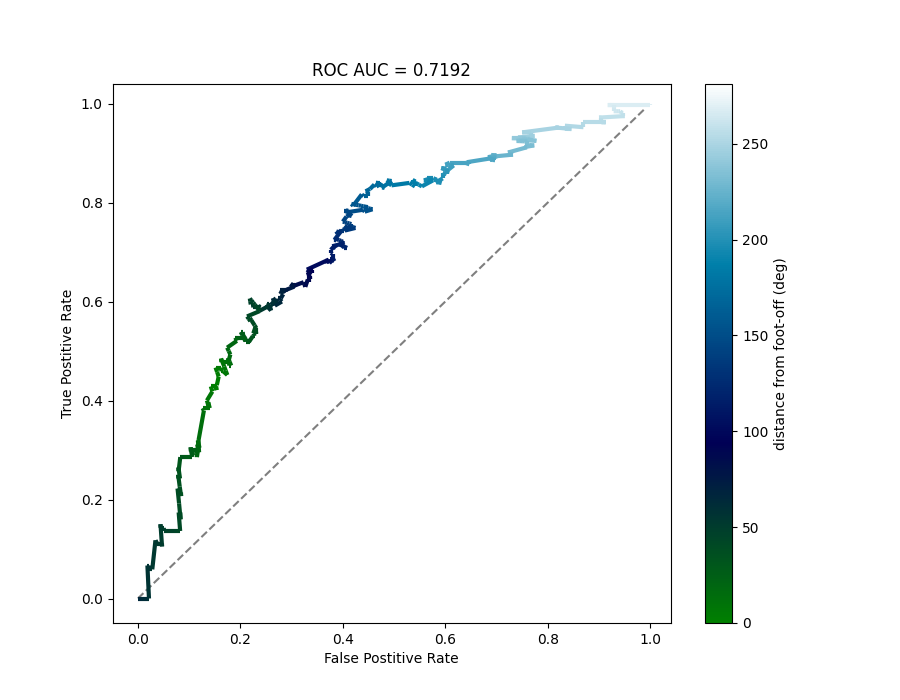

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
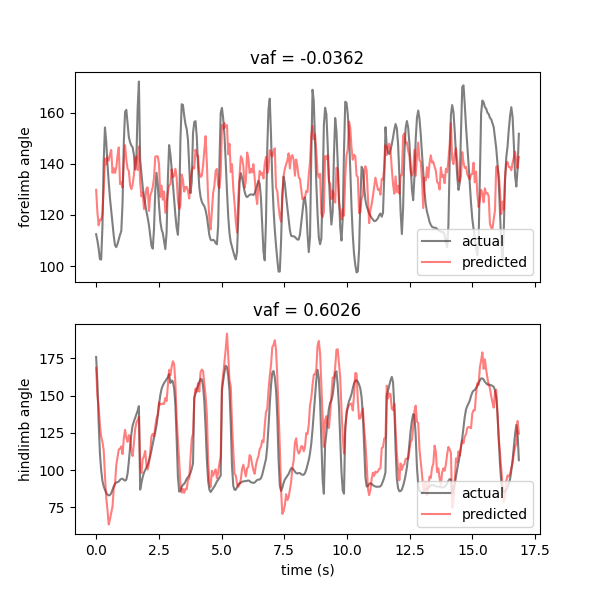

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
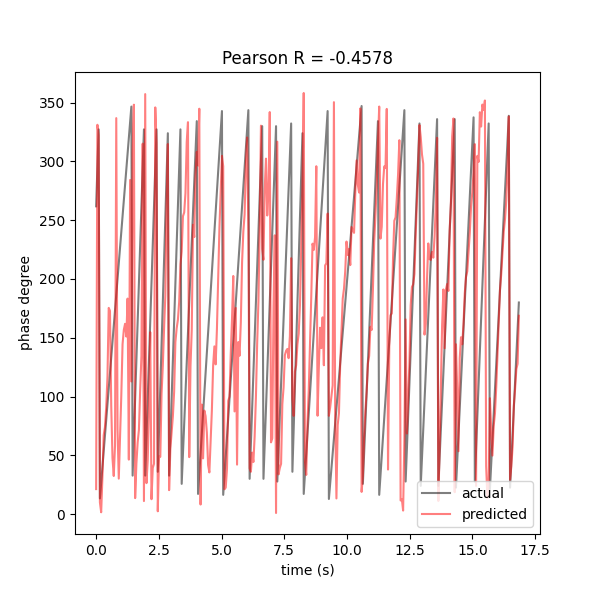

In [4]:
pearR1, _, _, pred1, test1, _, swing_mean1, vaf1, h_angle1, test_angle_rates1, test_angle_angle1 = data1.phase_train(upper_limit = UL, lower_limit = LL)
fascilli_roc(test1, pred1, swing_mean1, plotting = True)
show_comparison(vaf1, test_angle_angle1, test_angle_rates1, h_angle1)
ts1 = np.linspace(0, (test1.shape[0]*50)/1000,test1.shape[0])
fig1, ax = plt.subplots(1,1, figsize=(6,6), sharey=False)
ax.plot(ts1, test1, color = 'k', alpha = 0.5, label = 'actual')
ax.plot(ts1, pred1, color = 'r', alpha = 0.5, label = 'predicted')
ax.set_ylabel('phase degree')
ax.legend(loc='lower right')
ax.set_xlabel('time (s)')
ax.set_title("Pearson R = {0:.4f}".format(pearR1))
sin_t1, cos_t1 = sine_and_cosine(test1)
sin_p1, cos_p1 = sine_and_cosine(pred1)
print(pearR1)
print(np.mean([r2_score(sin_t1, sin_p1),r2_score(cos_t1, cos_p1)]))
print(vaf1[6])
print(vaf1[3])

-0.5533694375477437
-1.1630829478090399
-0.9214034862283282
-0.5941208635546409
-0.40866540731857326
-0.6696083883581628
-0.9148164561004217
-0.5979450243836295
-0.7857857225857712
-0.5838269326545683
-0.719262466654088
-0.4049530518964579
-0.08431017667881387
0.001961551179786347


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
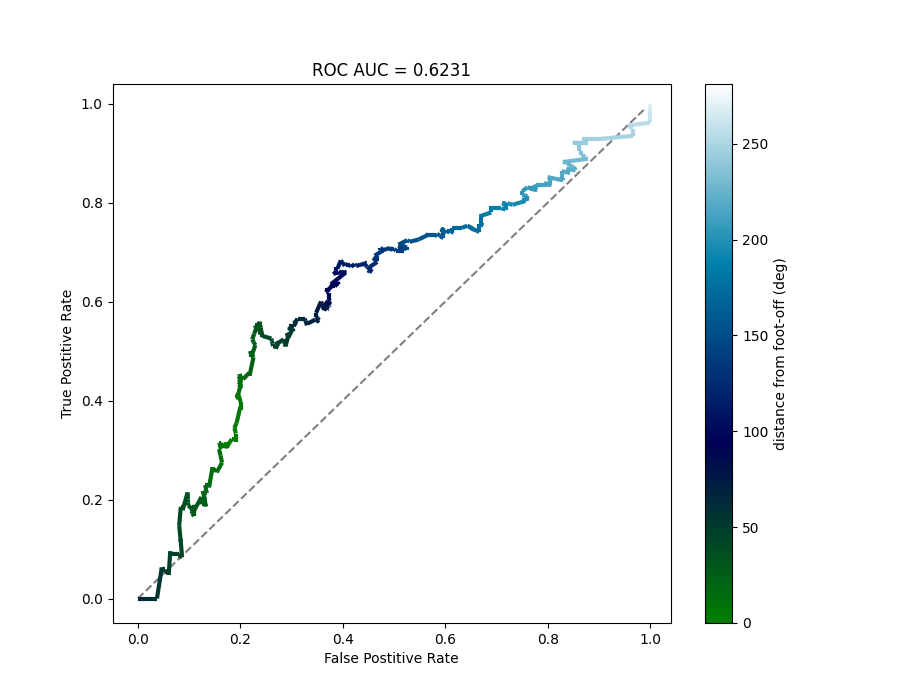

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
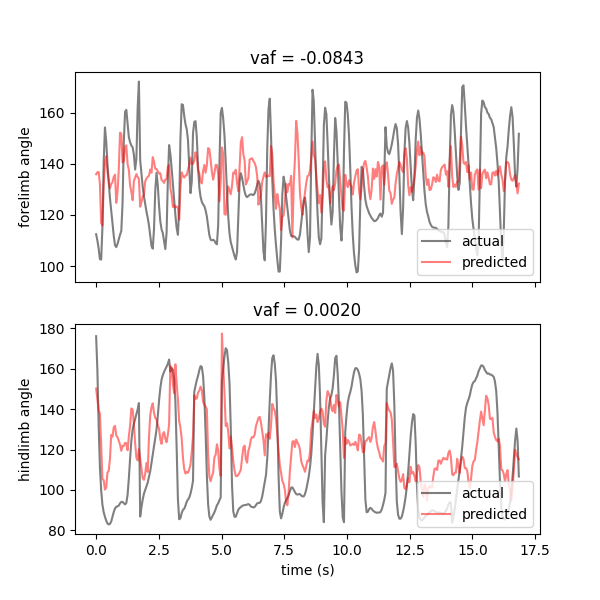

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
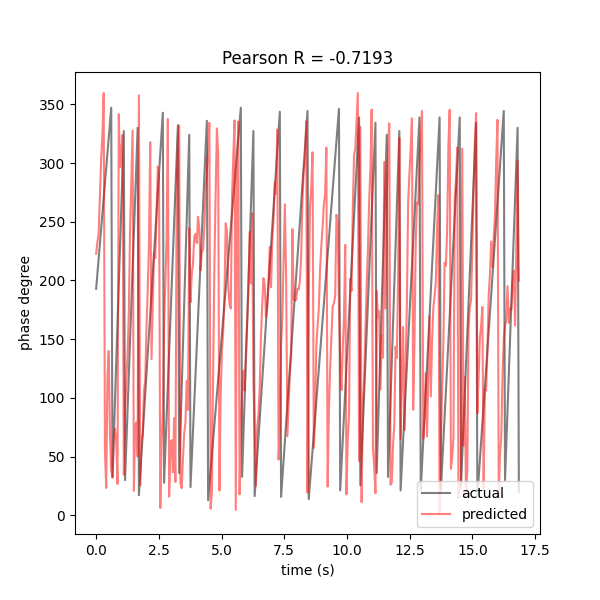

In [5]:
pearR2, _, _, pred2, test2, _, swing_mean2, vaf2, h_angle2, test_angle_rates2, test_angle_angle2 = data2.phase_train(upper_limit = UL, lower_limit = LL)
fascilli_roc(test2, pred2, swing_mean2, plotting = True)
show_comparison(vaf2, test_angle_angle2, test_angle_rates2, h_angle2)
ts2 = np.linspace(0, (test2.shape[0]*50)/1000,test2.shape[0])
fig2, ax = plt.subplots(1,1, figsize=(6,6), sharey=False)
ax.plot(ts2, test2, color = 'k', alpha = 0.5, label = 'actual')
ax.plot(ts2, pred2, color = 'r', alpha = 0.5, label = 'predicted')
ax.set_ylabel('phase degree')
ax.legend(loc='lower right')
ax.set_xlabel('time (s)')
ax.set_title("Pearson R = {0:.4f}".format(pearR2))
sin_t2, cos_t2 = sine_and_cosine(test2)
sin_p2, cos_p2 = sine_and_cosine(pred2)
print(pearR2)
print(np.mean([r2_score(sin_t2, sin_p2),r2_score(cos_t2, cos_p2)]))
print(vaf2[6])
print(vaf2[3])

0.32215807977649363
-0.16436740900417457
-0.004633024788874363
-0.41777120738408013


/home/grant/anaconda3/envs/rat-fes/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
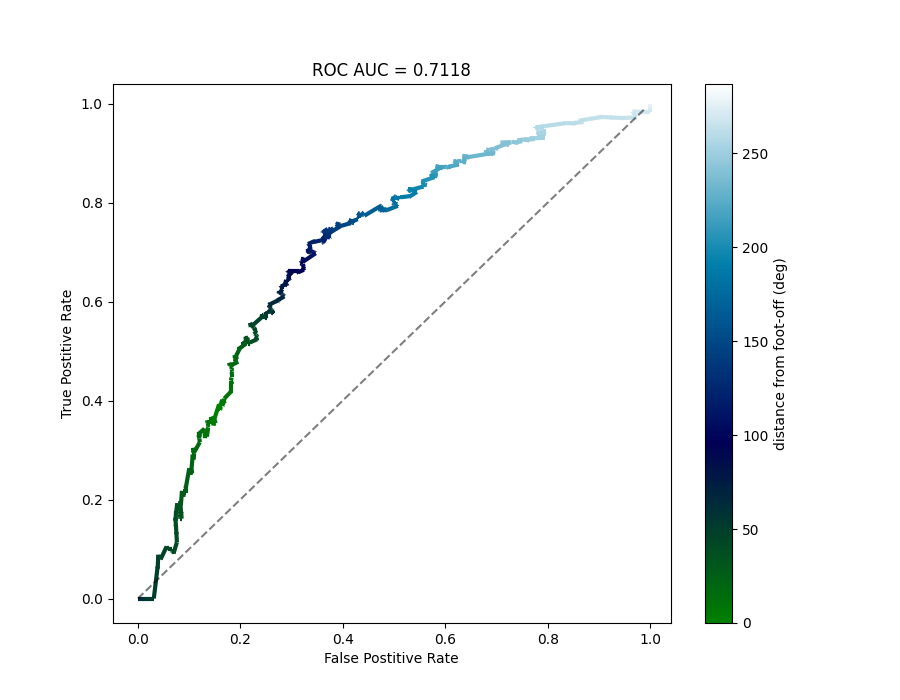

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
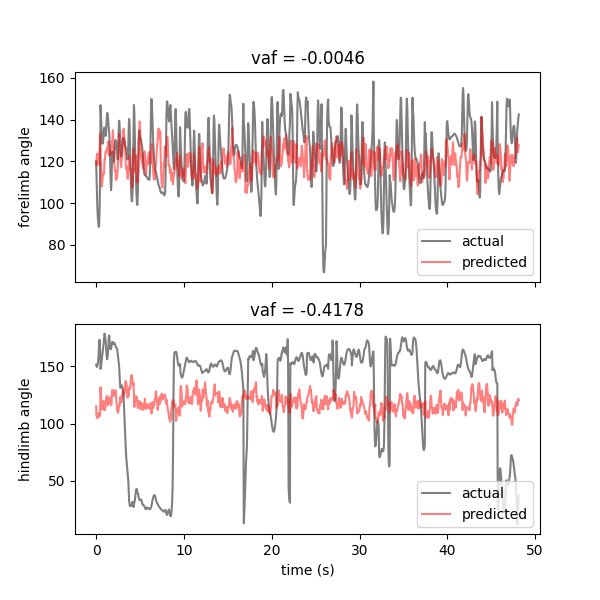

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
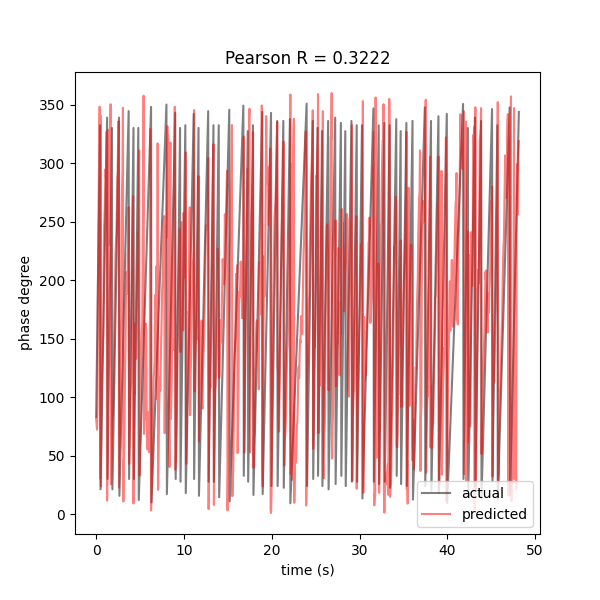

In [18]:
pearR3, _, _, pred3, test3, _, swing_mean3, vaf3, h_angle3, test_angle_rates3, test_angle_angle3 = data3.phase_train(upper_limit = UL, lower_limit = LL)
fascilli_roc(test3, pred3, swing_mean3, plotting = True)
show_comparison(vaf3, test_angle_angle3, test_angle_rates3, h_angle3)
ts3 = np.linspace(0, (test3.shape[0]*50)/1000,test3.shape[0])
fig3, ax = plt.subplots(1,1, figsize=(6,6), sharey=False)
ax.plot(ts3, test3, color = 'k', alpha = 0.5, label = 'actual')
ax.plot(ts3, pred3, color = 'r', alpha = 0.5, label = 'predicted')
ax.set_ylabel('phase degree')
ax.legend(loc='lower right')
ax.set_xlabel('time (s)')
ax.set_title("Pearson R = {0:.4f}".format(pearR3))
sin_t3, cos_t3 = sine_and_cosine(test3)
sin_p3, cos_p3 = sine_and_cosine(pred3)
print(pearR3)
print(np.mean([r2_score(sin_t3, sin_p3),r2_score(cos_t3, cos_p3)]))
print(vaf3[6])
print(vaf3[3])

0.0876297821142152
-0.5834719127460878
-0.1149060793567472
-0.16243383975000225


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
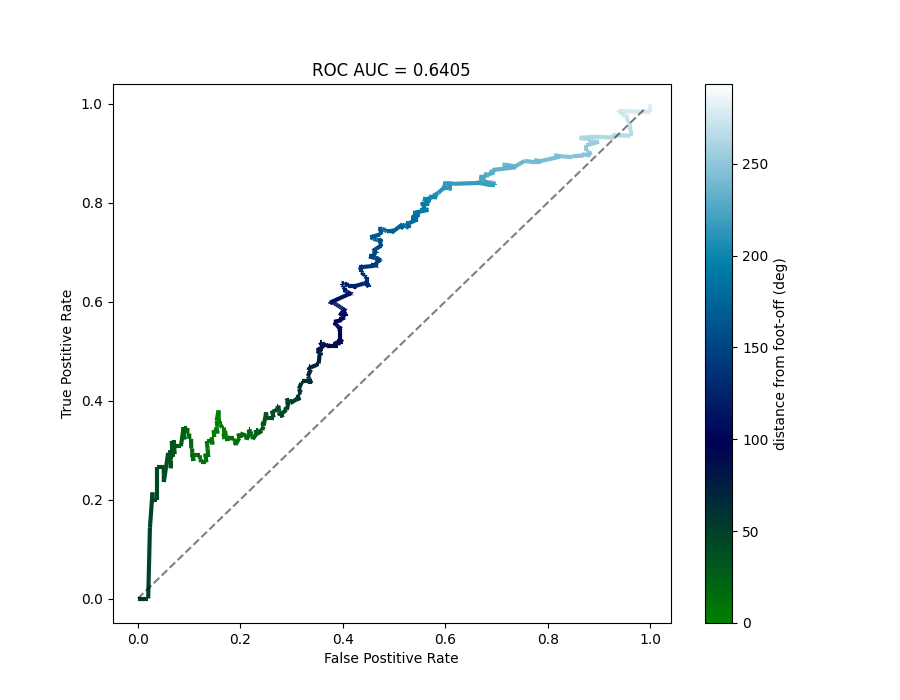

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
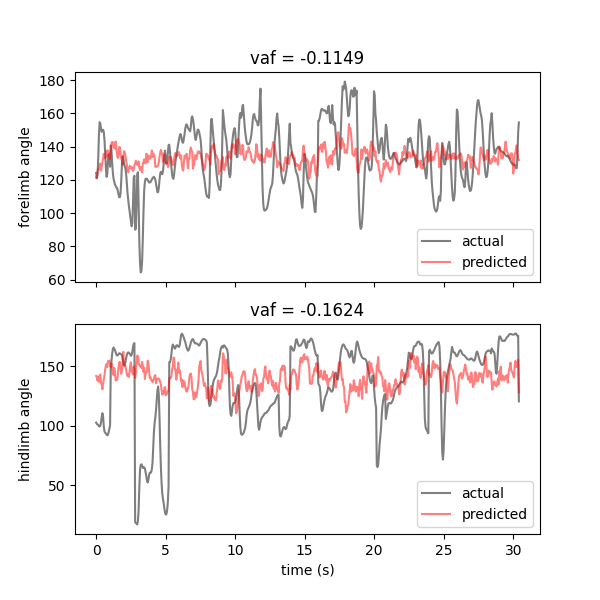

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
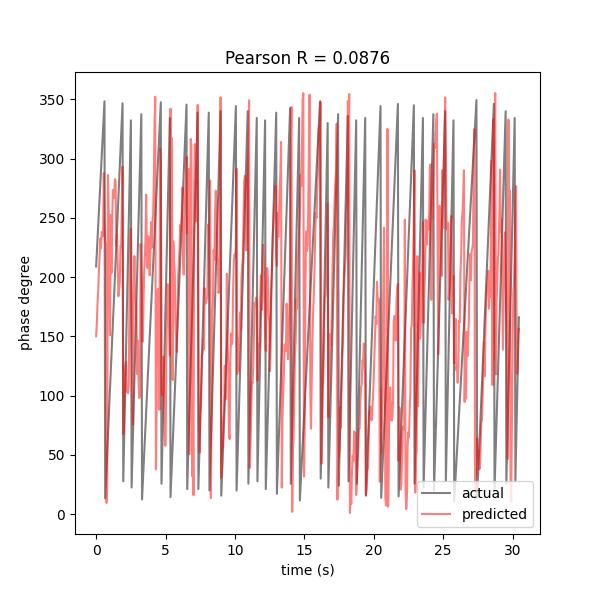

In [19]:
pearR4, _, _, pred4, test4, _, swing_mean4, vaf4, h_angle4, test_angle_rates4, test_angle_angle4 = data4.phase_train(upper_limit = UL, lower_limit = LL)
fascilli_roc(test4, pred4, swing_mean4, plotting = True)
show_comparison(vaf4, test_angle_angle4, test_angle_rates4, h_angle4)
ts4 = np.linspace(0, (test4.shape[0]*50)/1000,test4.shape[0])
fig4, ax = plt.subplots(1,1, figsize=(6,6), sharey=False)
ax.plot(ts4, test4, color = 'k', alpha = 0.5, label = 'actual')
ax.plot(ts4, pred4, color = 'r', alpha = 0.5, label = 'predicted')
ax.set_ylabel('phase degree')
ax.legend(loc='lower right')
ax.set_xlabel('time (s)')
ax.set_title("Pearson R = {0:.4f}".format(pearR4))
sin_t4, cos_t4 = sine_and_cosine(test4)
sin_p4, cos_p4 = sine_and_cosine(pred4)
print(pearR4)
print(np.mean([r2_score(sin_t4, sin_p4),r2_score(cos_t4, cos_p4)]))
print(vaf4[6])
print(vaf4[3])

0.2851821519012733
-0.1976959745954462
-0.05527233015800478
-0.7810949416152251


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
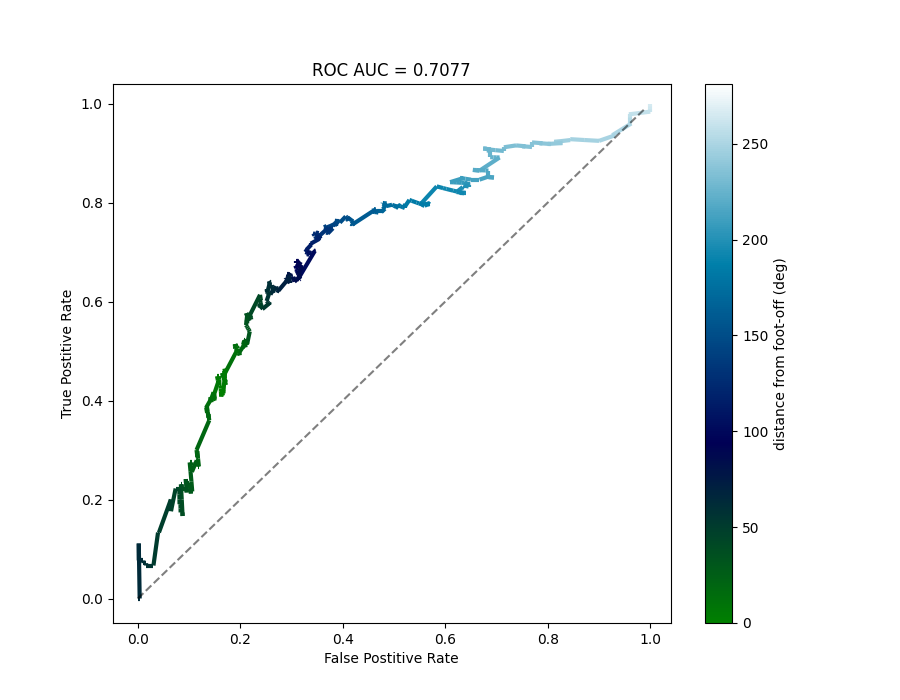

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
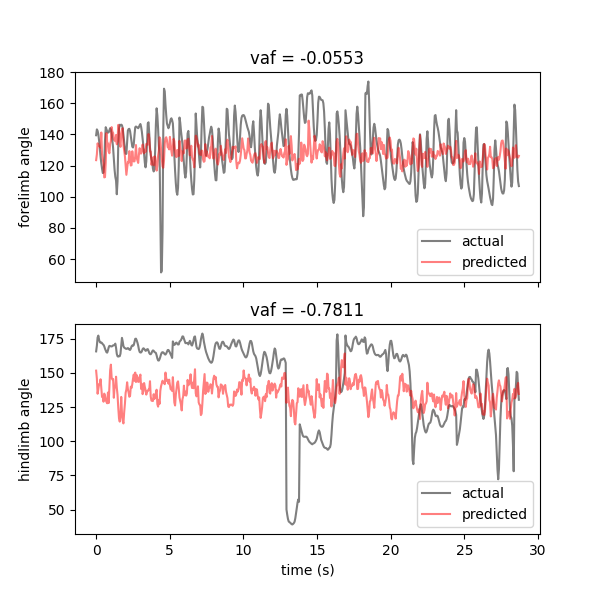

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
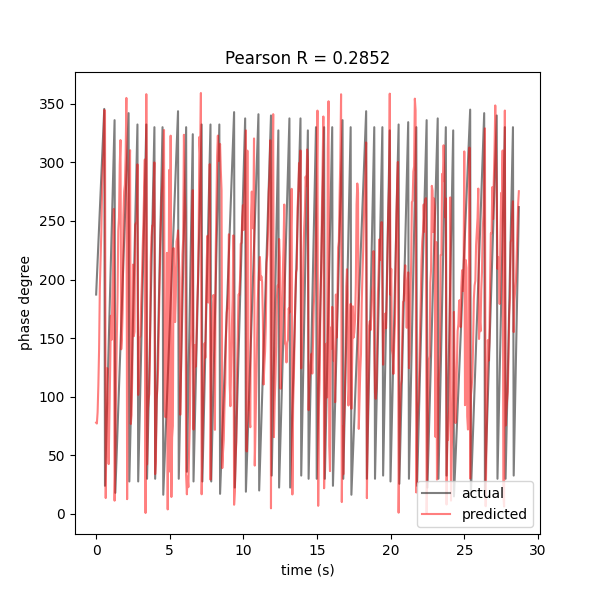

In [20]:
pearR5, _, _, pred5, test5, _, swing_mean5, vaf5, h_angle5, test_angle_rates5, test_angle_angle5 = data5.phase_train(upper_limit = UL, lower_limit = LL)
fascilli_roc(test5, pred5, swing_mean5, plotting = True)
show_comparison(vaf5, test_angle_angle5, test_angle_rates5, h_angle5)
ts5 = np.linspace(0, (test5.shape[0]*50)/1000,test5.shape[0])
fig5, ax = plt.subplots(1,1, figsize=(6,6), sharey=False)
ax.plot(ts5, test5, color = 'k', alpha = 0.5, label = 'actual')
ax.plot(ts5, pred5, color = 'r', alpha = 0.5, label = 'predicted')
ax.set_ylabel('phase degree')
ax.legend(loc='lower right')
ax.set_xlabel('time (s)')
ax.set_title("Pearson R = {0:.4f}".format(pearR5))
sin_t5, cos_t5 = sine_and_cosine(test5)
sin_p5, cos_p5 = sine_and_cosine(pred5)
print(pearR5)
print(np.mean([r2_score(sin_t5, sin_p5),r2_score(cos_t5, cos_p5)]))
print(vaf5[6])
print(vaf5[3])

0.344843941317738
-0.1288590331134406
0.03748584118613518
0.5164088457375219


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
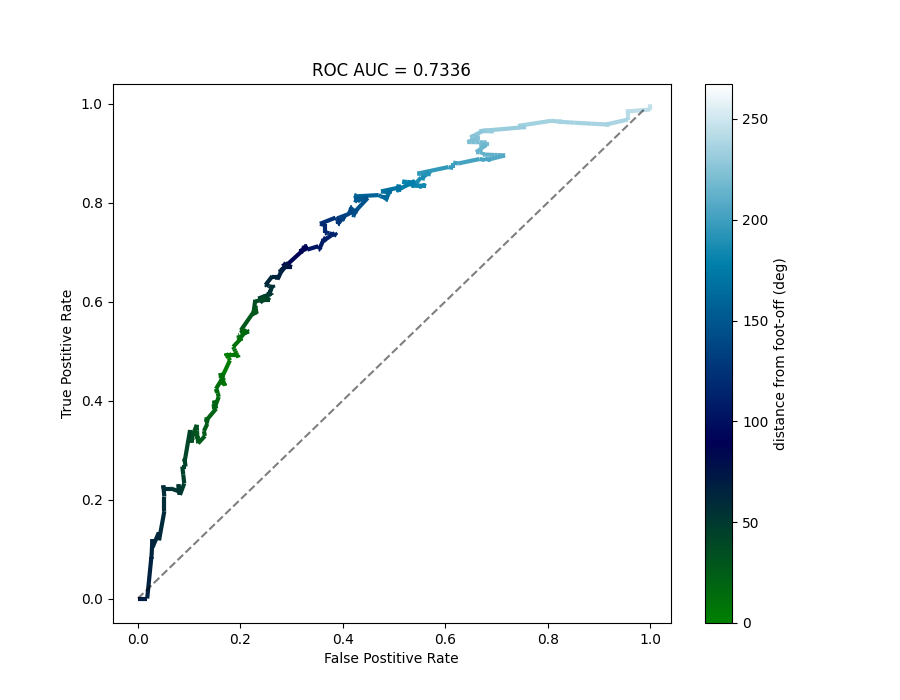

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
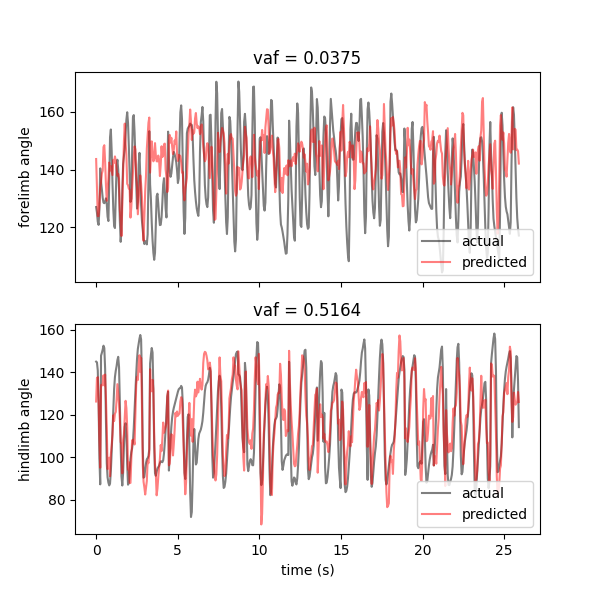

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
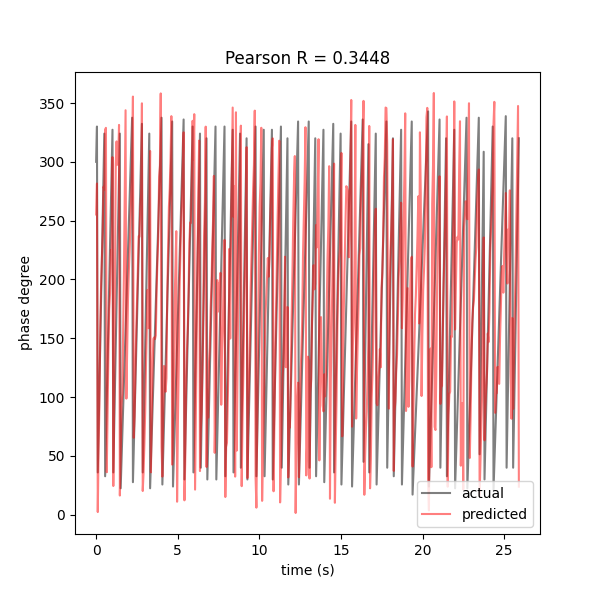

In [9]:
pearR6, _, _, pred6, test6, _, swing_mean6, vaf6, h_angle6, test_angle_rates6, test_angle_angle6 = data6.phase_train(upper_limit = UL, lower_limit = LL)
fascilli_roc(test6, pred6, swing_mean6, plotting = True)
show_comparison(vaf6, test_angle_angle6, test_angle_rates6, h_angle6)
ts6 = np.linspace(0, (test6.shape[0]*50)/1000,test6.shape[0])
fig6, ax = plt.subplots(1,1, figsize=(6,6), sharey=False)
ax.plot(ts6, test6, color = 'k', alpha = 0.5, label = 'actual')
ax.plot(ts6, pred6, color = 'r', alpha = 0.5, label = 'predicted')
ax.set_ylabel('phase degree')
ax.legend(loc='lower right')
ax.set_xlabel('time (s)')
ax.set_title("Pearson R = {0:.4f}".format(pearR6))
sin_t6, cos_t6 = sine_and_cosine(test6)
sin_p6, cos_p6 = sine_and_cosine(pred6)
print(pearR6)
print(np.mean([r2_score(sin_t6, sin_p6),r2_score(cos_t6, cos_p6)]))
print(vaf6[6])
print(vaf6[3])

0.33042467532185876
0.013446292866674259
0.04137081708589942
0.4545109045533485


/home/grant/anaconda3/envs/rat-fes/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
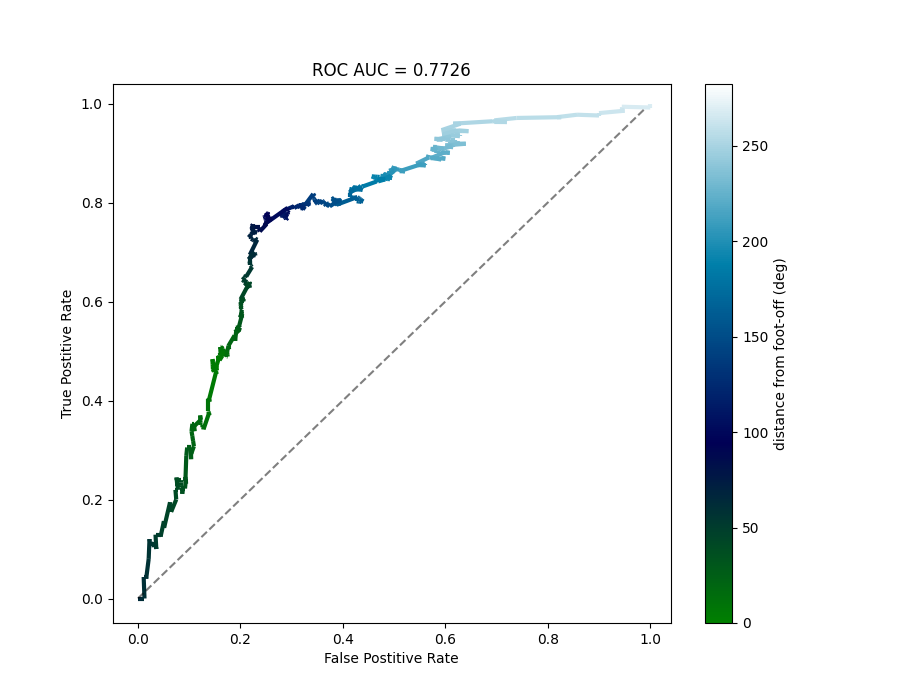

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
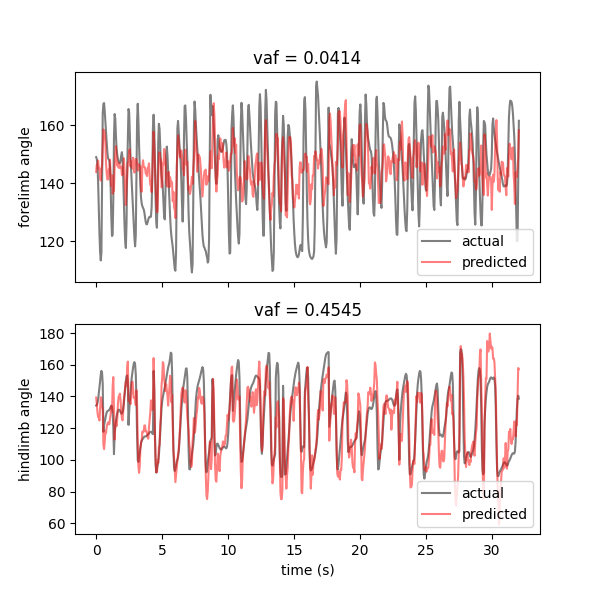

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
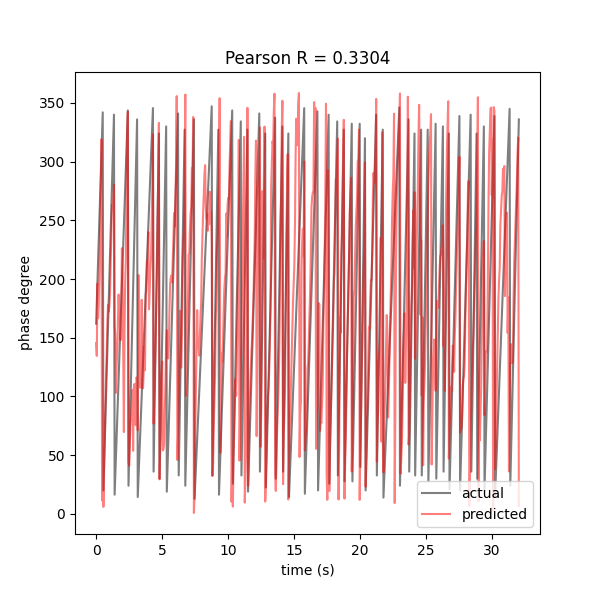

In [10]:
pearR7, _, _, pred7, test7, _, swing_mean7, vaf7, h_angle7, test_angle_rates7, test_angle_angle7 = data7.phase_train(upper_limit = UL, lower_limit = LL)
fascilli_roc(test7, pred7, swing_mean7, plotting = True)
show_comparison(vaf7, test_angle_angle7, test_angle_rates7, h_angle7)
ts7 = np.linspace(0, (test7.shape[0]*50)/1000,test7.shape[0])
fig7, ax = plt.subplots(1,1, figsize=(6,6), sharey=False)
ax.plot(ts7, test7, color = 'k', alpha = 0.5, label = 'actual')
ax.plot(ts7, pred7, color = 'r', alpha = 0.5, label = 'predicted')
ax.set_ylabel('phase degree')
ax.legend(loc='lower right')
ax.set_xlabel('time (s)')
ax.set_title("Pearson R = {0:.4f}".format(pearR7))
sin_t7, cos_t7 = sine_and_cosine(test7)
sin_p7, cos_p7 = sine_and_cosine(pred7)
print(pearR7)
print(np.mean([r2_score(sin_t7, sin_p7),r2_score(cos_t7, cos_p7)]))
print(vaf7[6])
print(vaf7[3])